# Exploratory Data Analysis (EDA) of London Housing Data

## Objectives

This notebook analyzes the house prices data of the boroughs with [Greater London](https://en.wikipedia.org/wiki/London_boroughs), in order to answer 

***Which boroughs of London are more desirable to live in?***

The question above is answered by investigating

***Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

## Outline

This notebook is organized into four sections:

1. [Sourcing and loading](#section_1) 
2. [Cleaning, transforming, and visualizing](#section_2) 
3. [Modeling](#section_3) 
4. [Conclusion](#section_4)


### 1. Sourcing and Loading<a id='section_1'></a> 

We start by importing [pandas](https://pandas.pydata.org/), [Numpy](http://www.numpy.org/), [Matplotlib](https://matplotlib.org/) and [datetime](https://docs.python.org/3/library/datetime.html) libraries. 

#### 1.1. Importing Libraries

In [1]:
# Import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

from datetime import datetime

#### 1.2.  Loading the data
The data for this analysis comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# The data we are interested in is located at
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The Excel file at the above url has a sheet 'Average price' which contains the data of interest.

# This is directly read as follows:
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing<a id='section_2'></a> 

In this section, we explore and visualize various aspects of the data, perform data cleaning and transformation with an ultimate goal to have tidy data at the end. With tidy data: 

1. Each variable will have a column.
2. Each observation will form a row.

**2.1. Exploring the data** 

We will use various pandas functions to explore the dataframe

##### 2.1.1 View various aspects of data

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [4]:
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
313,2021-01-01,760599.2322,311007.1517,538842.4015,356664.073,511347.8856,458538.6051,794463.2032,382310.371,498642.3074,...,182023.0688,181210.319,211662.9753,213767.7896,307093.7156,500709.9478,340693.8825,277604.5982,NaN,266913.9713
314,2021-02-01,729315.7243,313835.8023,538215.8867,360116.1134,514388.7387,458024.7806,790813.8985,384846.606,497676.6553,...,185491.1439,182171.964,214806.6452,217428.1605,310402.8157,493212.3662,342381.2949,280339.3706,NaN,269052.4737
315,2021-03-01,717528.2633,314187.4036,542872.3895,364480.9055,519212.9441,460420.733,806482.3416,390512.0744,502120.9189,...,188555.1194,185494.4564,216077.5896,219461.1998,313973.0585,504384.0052,348865.2391,286189.8736,NaN,273495.3486
316,2021-04-01,713094.5391,309680.5549,545746.3543,365519.4195,498083.9417,466961.6711,820036.1029,391131.5997,508489.5758,...,186596.2972,180465.4181,216576.9387,217987.4542,313370.6513,501209.9372,345114.7342,279274.2848,NaN,270387.7893
317,2021-05-01,765822.2726,308760.1446,546082.2634,368554.8059,508570.7598,485946.8184,835265.0364,385311.3588,508906.9811,...,189245.3679,181855.6158,216077.0382,219793.3218,310200.2564,497947.9589,350015.5072,277602.6983,NaN,271433.8707


#####  We see that the borough names are columns. For easier analysis it would be good to have them as rows. 

In [5]:
properties.shape

(318, 49)

##### The data appears to have been gathered on the first of the month. From January of 1995 to April of 2021, there are 26x12+4 = 316 months. Our data has 317 rows. Additionally, as mentioned in  the problem statement & on Wikipedia page London has 32 boroughs, whereas the dataframe has 49 columns. 

##### Visual inspection reveals that the first row has alphanumeric data which will not be particularly relevant to study the avergae home price evolution in the boroughs.

##### Lets look at the column names 

In [6]:
properties.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

##### City of London is not a London borough as per the Wikipedia page. Furthermore an alphabetical sort on Wikipedia of the borough names reveals the borough names to be from 'Barking & Dagenham' to 'Westminister'. Let's verify if these constitue the 32 boroughs in our data.

In [7]:
properties.loc[1:,'Barking & Dagenham':'Westminster'].shape

(317, 32)

##### So these are indeed the 32 London boroughs that we need to analyze. Next lets see if there is any missing data. 

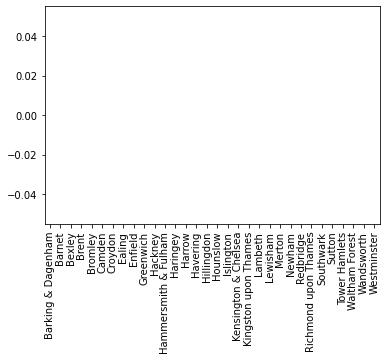

Barking & Dagenham      False
Barnet                  False
Bexley                  False
Brent                   False
Bromley                 False
Camden                  False
Croydon                 False
Ealing                  False
Enfield                 False
Greenwich               False
Hackney                 False
Hammersmith & Fulham    False
Haringey                False
Harrow                  False
Havering                False
Hillingdon              False
Hounslow                False
Islington               False
Kensington & Chelsea    False
Kingston upon Thames    False
Lambeth                 False
Lewisham                False
Merton                  False
Newham                  False
Redbridge               False
Richmond upon Thames    False
Southwark               False
Sutton                  False
Tower Hamlets           False
Waltham Forest          False
Wandsworth              False
Westminster             False
dtype: bool


In [8]:
## We can plot the number of times NaN value appears in the corresponding column as follows:
properties.loc[1:,'Barking & Dagenham':'Westminster'].isna().sum().plot(kind="bar")
plt.show()
## Alternatively we may choose to just visually print a tabular column and see if True shows up anywhere
print(properties.loc[1:,'Barking & Dagenham':'Westminster'].isna().any())

##### We do not see any bar in the plot or a True value against the burough names. Thus, we do not have missing data for any of the boroughs. 

**2.2. Cleaning the data**

As observed earlier, for ease of subsequent analysis it would be better to have the Burroughs data in rows as opposed to columns

In [9]:
### Lets select the data we want to work with. We want the dates stored in column 'Unnamed:0' and we want the other
### 32 columns identified before.
properties_sel = properties[['Unnamed: 0'] + list(properties.loc[:,'Barking & Dagenham':'Westminster'])]
properties_sel.head()

,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,NaT,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,82070.6133,53539.31919,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,79982.74872,53153.88306,72141.6261,111103.0394,64799.0648,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,80661.68279,53458.26393,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,...,79990.54333,54479.75395,72228.60295,106875,63073.62117,69411.9439,66233.19383,60971.39722,87026.00225,133370.2036


In [10]:
### Finally lets organize the dataframe so that each burough names represents a particular row
properties_sel.set_index('Unnamed: 0', inplace=True)
properties_tr = properties_sel.transpose()
properties_tr.reset_index(inplace=True)
properties_tr.head()

Unnamed: 0,index,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
0,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,304923.5027,301702.4656,304852.1338,305012.3291,309560.1023,311007.1517,313835.8023,314187.4036,309680.5549,308760.1446
1,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,529660.1524,533619.23,530353.5205,528816.4928,532528.0926,538842.4015,538215.8867,542872.3895,545746.3543,546082.2634
2,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,346679.9244,345061.4945,345404.9836,346252.9145,352260.8385,356664.073,360116.1134,364480.9055,365519.4195,368554.8059
3,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,497729.0327,519561.8277,522239.3216,513100.814,495066.6459,511347.8856,514388.7387,519212.9441,498083.9417,508570.7598
4,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,433422.5529,435059.5551,437146.4066,445154.9752,453388.6856,458538.6051,458024.7806,460420.733,466961.6711,485946.8184


**2.3. Cleaning the data (part 2)**

After transforming from column data to row data, the column name of the dataframe is now a datetime object. This is fixed as follows:

In [11]:
#### Rnaming the columns
properties_tr.rename(columns={'index': 'Boroughs'}, inplace=True)
properties_tr.columns = properties_tr.columns.fillna('ID')
for x in properties_tr.columns.tolist()[2:]:
    properties_tr.rename(columns={x:x.strftime('%Y/%m/%d')}, inplace=True)
properties_tr.head()

Unnamed: 0,Boroughs,ID,1995/01/01,1995/02/01,1995/03/01,1995/04/01,1995/05/01,1995/06/01,1995/07/01,1995/08/01,...,2020/08/01,2020/09/01,2020/10/01,2020/11/01,2020/12/01,2021/01/01,2021/02/01,2021/03/01,2021/04/01,2021/05/01
0,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,304923.5027,301702.4656,304852.1338,305012.3291,309560.1023,311007.1517,313835.8023,314187.4036,309680.5549,308760.1446
1,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,529660.1524,533619.23,530353.5205,528816.4928,532528.0926,538842.4015,538215.8867,542872.3895,545746.3543,546082.2634
2,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,346679.9244,345061.4945,345404.9836,346252.9145,352260.8385,356664.073,360116.1134,364480.9055,365519.4195,368554.8059
3,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,497729.0327,519561.8277,522239.3216,513100.814,495066.6459,511347.8856,514388.7387,519212.9441,498083.9417,508570.7598
4,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,433422.5529,435059.5551,437146.4066,445154.9752,453388.6856,458538.6051,458024.7806,460420.733,466961.6711,485946.8184


**2.4.Transforming the data**

A tidy DataFrame can be obtained by recogninzing that the columns above represent the avergae house prices in the respective Boroughs. By melting, the wide format of the existing DataFrame can be transformed into a more manageable 
long format.

In [12]:
#### While melting dataframe value_vars is expected to be a list of column names. If we have many columns the code below 
#### can be used to obtain the column list
date_list = properties_tr.columns.tolist()[2:]
properties_tr2 = properties_tr.melt(id_vars=['Boroughs','ID'], value_vars = date_list, var_name = ['year_month'], value_name='avg_price')
properties_tr2.head()

,Boroughs,ID,year_month,avg_price
0,Barking & Dagenham,E09000002,1995/01/01,50460.2266
1,Barnet,E09000003,1995/01/01,93284.51832
2,Bexley,E09000004,1995/01/01,64958.09036
3,Brent,E09000005,1995/01/01,71306.56698
4,Bromley,E09000006,1995/01/01,81671.47692


Let's make sure the column data types are all correct. 

In [13]:
properties_tr2.dtypes

Boroughs      object
ID            object
year_month    object
avg_price     object
dtype: object

##### The avg_price should be a float

In [14]:
properties_tr2['avg_price'] = properties_tr2['avg_price'].astype(float)
properties_tr2.dtypes

Boroughs       object
ID             object
year_month     object
avg_price     float64
dtype: object

**2.5. Cleaning the data (part 3)**

Lets make sure we have an equal number of observations in all the columns

In [15]:
print(properties_tr2['Boroughs'].shape)
print(properties_tr2['ID'].shape)
print(properties_tr2['year_month'].shape)
print(properties_tr2['avg_price'].shape)

(10144,)
(10144,)
(10144,)
(10144,)


In [18]:
properties_tr2['year'] = properties_tr2['year_month'].str.slice(0,4)
properties_tr2.head()

,Boroughs,ID,year_month,avg_price,year
0,Barking & Dagenham,E09000002,1995/01/01,50460.22660,1995
1,Barnet,E09000003,1995/01/01,93284.51832,1995
2,Bexley,E09000004,1995/01/01,64958.09036,1995
3,Brent,E09000005,1995/01/01,71306.56698,1995
4,Bromley,E09000006,1995/01/01,81671.47692,1995


**2.6. Visualizing the data**

Next we can visualize the change in House Prices for a particular borough

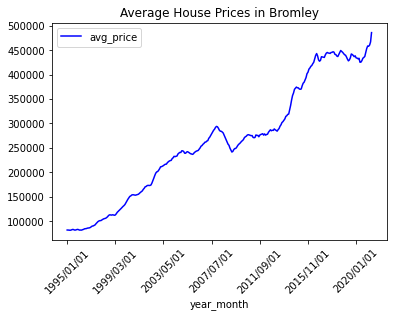

In [16]:
brom_dat = properties_tr2.query('Boroughs=="Bromley"').copy()
brom_dat.plot(x="year_month", y="avg_price", kind="line", color="blue", rot=45)
plt.title("Average House Prices in Bromley")
plt.show()

**3. Modeling**<a id='section_3'></a> 


In this section we write a function that will calculate a ratio of house prices based on start and end years for a given Borough.

                 Borough  Price Ratio
10               Hackney     6.198286
29        Waltham Forest     5.834756
26             Southwark     5.516485
21              Lewisham     5.449221
31           Westminster     5.353565
23                Newham     5.305390
12              Haringey     5.134625
18  Kensington & Chelsea     5.082465
20               Lambeth     4.957751
5                 Camden     4.935353
0     Barking & Dagenham     4.896619
3                  Brent     4.894554
17             Islington     4.844048
9              Greenwich     4.763036
30            Wandsworth     4.757709
22                Merton     4.741273
28         Tower Hamlets     4.626701
24             Redbridge     4.471182
1                 Barnet     4.358196
14              Havering     4.325230
7                 Ealing     4.311451
19  Kingston upon Thames     4.270550
8                Enfield     4.263472
2                 Bexley     4.248977
6                Croydon     4.201100
15          

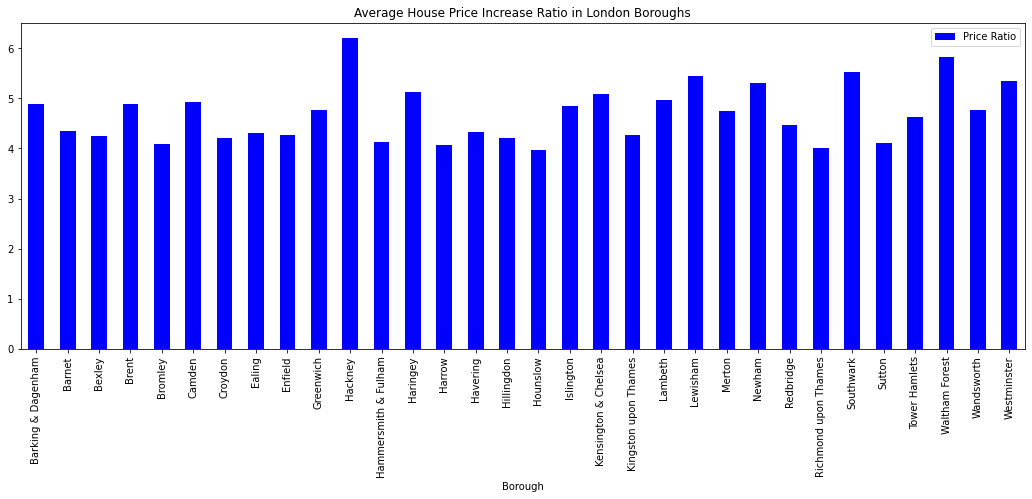

In [19]:
# Create function to calculate the house price ratio between end year and start year and
# USe this function to answer which London Borough saw the most change in house prices over the last 2 decades
def create_price_ratio(bor_name, start_year, end_year):
    bor_df = properties_tr2[properties_tr2['Boroughs']==bor_name].copy()
    pr_df = bor_df.groupby('year')
    strt_prc = pr_df.get_group(start_year)['avg_price'].mean()
    end_prc = pr_df.get_group(end_year)['avg_price'].mean()
    try:
        ratio = end_prc/strt_prc
    except:
        print('Division by zero error!')
    return ratio

bor_ratio = pd.DataFrame([(x, create_price_ratio(x, '1998', '2018')) for x in properties_tr['Boroughs']], columns =['Borough', 'Price Ratio'])
bor_ratio_srt = bor_ratio.sort_values('Price Ratio', ascending=False).copy()
print(bor_ratio_srt.iloc[0:32,:])    
bor_ratio.plot(x='Borough', y="Price Ratio", kind="bar", color="blue", figsize=(18,6))
plt.title("Average House Price Increase Ratio in London Boroughs")
plt.show()

### 4. Conclusion

#### From the available data, Hackney has the largest house price increase ratio among all the London boroughs. 